# Fix pathing

In [1]:
import sys


sys.path.append("../..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import json
import matplotlib.pyplot
import numpy as np


# Constants

In [4]:
FOLDER_NAME = "2024_04_16_22_39_28_GA"

FOLDER_PATH = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))), "Simulator", "data", FOLDER_NAME)


# Methods

In [5]:
def load_json(fileName):
    with open(os.path.join(FOLDER_PATH, fileName + ".json"), 'r') as file:
        data = json.load(file)

    return data


In [6]:
def plot_fitness_over_diversity(data):
    # Extract fitness and diversity data
    fitness_data = data['fitness']
    diversity_data = data['diversity']

    # Calculate best fitness for each generation
    best_fitness_per_generation = [min(gen) for gen in fitness_data]

    # Convert diversity data from list of lists to list
    diversity = [gen[0] for gen in diversity_data]

    # Adjusting the plot to improve clarity and aesthetics
    matplotlib.pyplot.figure(figsize=(12, 6))
    ax1 = matplotlib.pyplot.gca()  # Get current axes

    # Plot best fitness on the left y-axis
    ax1.plot(best_fitness_per_generation, label='Best Fitness', marker='o', color='b')
    ax1.set_xlabel('Generation')
    ax1.set_ylabel('Best Fitness', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.xaxis.set_major_locator(matplotlib.pyplot.MaxNLocator(integer=True))  # Ensure x-axis has only integer labels

    # Create a second y-axis for diversity
    ax2 = ax1.twinx()
    ax2.plot(diversity, label='Diversity', marker='x', linestyle='--', color='r')
    ax2.set_ylabel('Diversity', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim(0, 1)

    # Title and legend
    matplotlib.pyplot.title('Best Fitness and Diversity Over Generations')
    fig_legends = [matplotlib.pyplot.Line2D([0], [0], color='b', marker='o', lw=2),
                matplotlib.pyplot.Line2D([0], [0], color='r', marker='x', linestyle='--', lw=2)]
    ax1.legend(fig_legends, ['Best Fitness', 'Diversity'], loc='upper right')

    matplotlib.pyplot.show()


In [7]:
def plot_best_individual_response_times_objectives(data):
    # Extract the objectives data
    objectives_data = {key: data[key] for key in data.keys() if "response_time" in key}

    # Selecting the best individual's data for each generation (first individual of each generation)
    best_individuals_data = {key: [gen[0] / 60.0 for gen in objectives_data[key]] for key in objectives_data}

    # Plotting each objective for the best individual over generations
    matplotlib.pyplot.figure(figsize=(12, 8))
    ax1 = matplotlib.pyplot.gca()

    for key, values in best_individuals_data.items():
        matplotlib.pyplot.plot(values, label=key, marker='o')

    ax1.xaxis.set_major_locator(matplotlib.pyplot.MaxNLocator(integer=True))
    matplotlib.pyplot.title('Response Time Objectives for the Best Individual Over Generations')
    matplotlib.pyplot.xlabel('Generation')
    matplotlib.pyplot.ylabel('Response time (minutes)')
    matplotlib.pyplot.legend()
    matplotlib.pyplot.grid(True)
    matplotlib.pyplot.show()


In [8]:
def scatter_plot_over_two_objectives(data, generation = None, onlyBest = False):
    matplotlib.pyplot.figure(figsize=(12, 8))

    if generation is None:
        num_generations = len(data["avg_response_time_urban_a"])

        # Generate a color map
        colors = matplotlib.pyplot.cm.jet(np.linspace(0, 1, num_generations))

        # Plotting
        for i in range(num_generations):
            urban_times = data["avg_response_time_urban_a"][i]
            rural_times = data["avg_response_time_rural_a"][i]

            if not onlyBest:
                matplotlib.pyplot.scatter(urban_times, rural_times, color=colors[i], label=f'Generation {i}', alpha=0.6, edgecolors='none')

                matplotlib.pyplot.scatter(urban_times[0], rural_times[0], color=colors[i], edgecolors='black', alpha=0.9, marker='*', s=200)
            else:
                matplotlib.pyplot.scatter(urban_times[0], rural_times[0], color=colors[i], label=f'Generation {i}', edgecolors='black', alpha=0.9, marker='*', s=200)

        matplotlib.pyplot.title('Scatter Plot of Response Times Across All Generations')
        matplotlib.pyplot.legend(title="Generation", bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        urban_times = data["avg_response_time_urban_a"][generation]
        rural_times = data["avg_response_time_rural_a"][generation]

        # Create scatter plot
        matplotlib.pyplot.figure(figsize=(10, 6))
        if not onlyBest:
            matplotlib.pyplot.scatter(urban_times, rural_times, color='blue', alpha=0.6, edgecolors='black')
        matplotlib.pyplot.scatter(urban_times[0], rural_times[0], color='blue', edgecolors='black', alpha=0.9, marker='*', s=200)

        # Labeling the plot
        matplotlib.pyplot.title('Scatter Plot of Response Times for Generation ' + str(generation))

    matplotlib.pyplot.xlabel('Average Response Time Urban Area A')
    matplotlib.pyplot.ylabel('Average Response Time Rural Area A')
    matplotlib.pyplot.grid(True)
    matplotlib.pyplot.show()


In [9]:
def plot_objective_over_generations(data, objective_key: str):
    # Extracting the objective data across generations
    objective_data = np.array(data[objective_key])
    
    # Calculate the mean and best (minimum) objectives per generation
    mean_objectives = np.mean(objective_data, axis=1)
    best_objectives = np.min(objective_data, axis=1)
    
    generations = np.arange(len(mean_objectives))
    
    # Prepare the plot
    matplotlib.pyplot.figure(figsize=(10, 6))
    
    # Plotting individual points
    for gen_index, objectives in enumerate(objective_data):
        gen_array = np.full_like(objectives, gen_index)
        matplotlib.pyplot.scatter(gen_array, objectives, s=0.9, color='red', alpha=0.5, marker='x')

    # Plotting mean objectives
    matplotlib.pyplot.plot(generations, mean_objectives, label='Mean Objective', color='green', linewidth=2)
    
    # Plotting best objectives
    matplotlib.pyplot.plot(generations, best_objectives, label='Best Objective', color='blue', linestyle='--', linewidth=2)
    
    # Adding labels and title
    matplotlib.pyplot.xlabel('Generation')
    matplotlib.pyplot.ylabel(objective_key.replace("_", " ").title())
    matplotlib.pyplot.title(f'Objective Performance Over Generations: {objective_key.replace("_", " ").title()}')
    matplotlib.pyplot.legend()
    matplotlib.pyplot.show()


# Main

In [10]:
ga_data = load_json("heuristic")

for key, value in ga_data.items():
    print(key)


avg_response_time_rural_a
avg_response_time_rural_h
avg_response_time_rural_v1
avg_response_time_urban_a
avg_response_time_urban_h
avg_response_time_urban_v1
diversity
fitness
percentage_violations
percentage_violations_rural
percentage_violations_urban


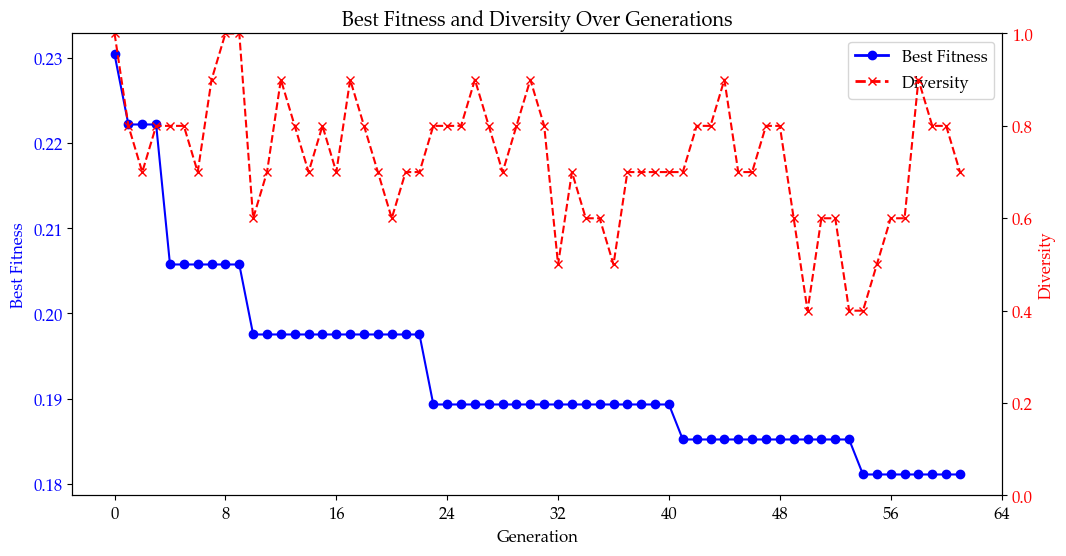

In [11]:
plot_fitness_over_diversity(ga_data)


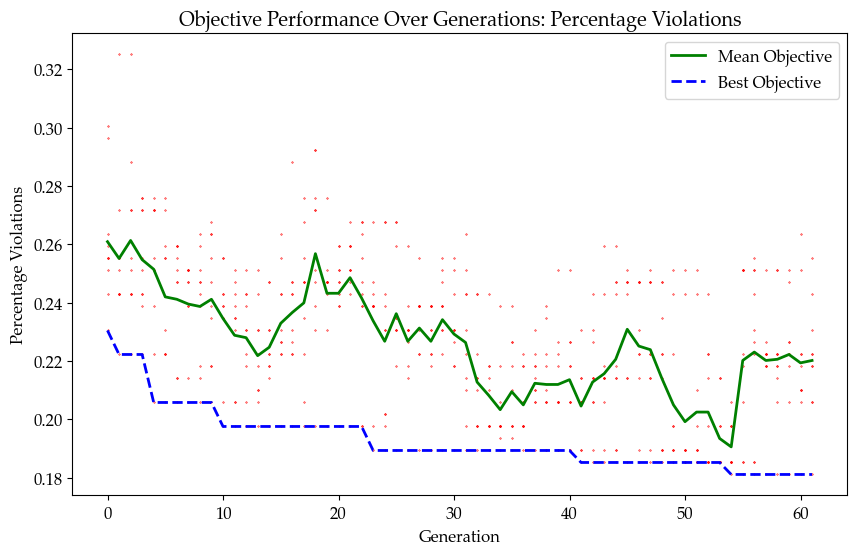

In [12]:
plot_objective_over_generations(ga_data, "percentage_violations")


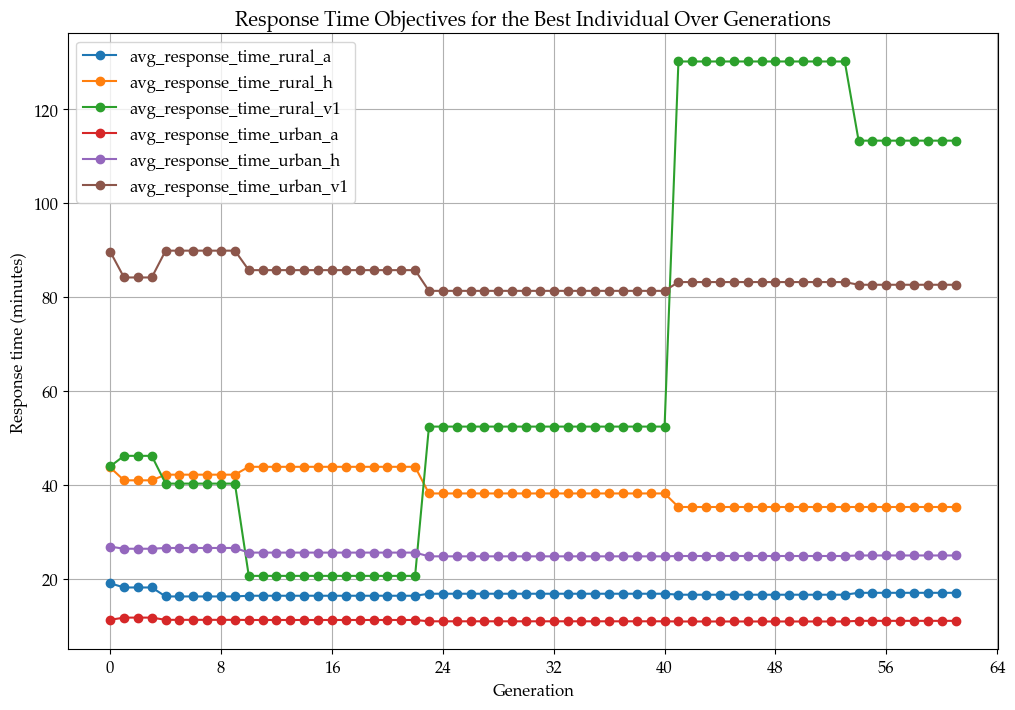

In [13]:
plot_best_individual_response_times_objectives(ga_data)


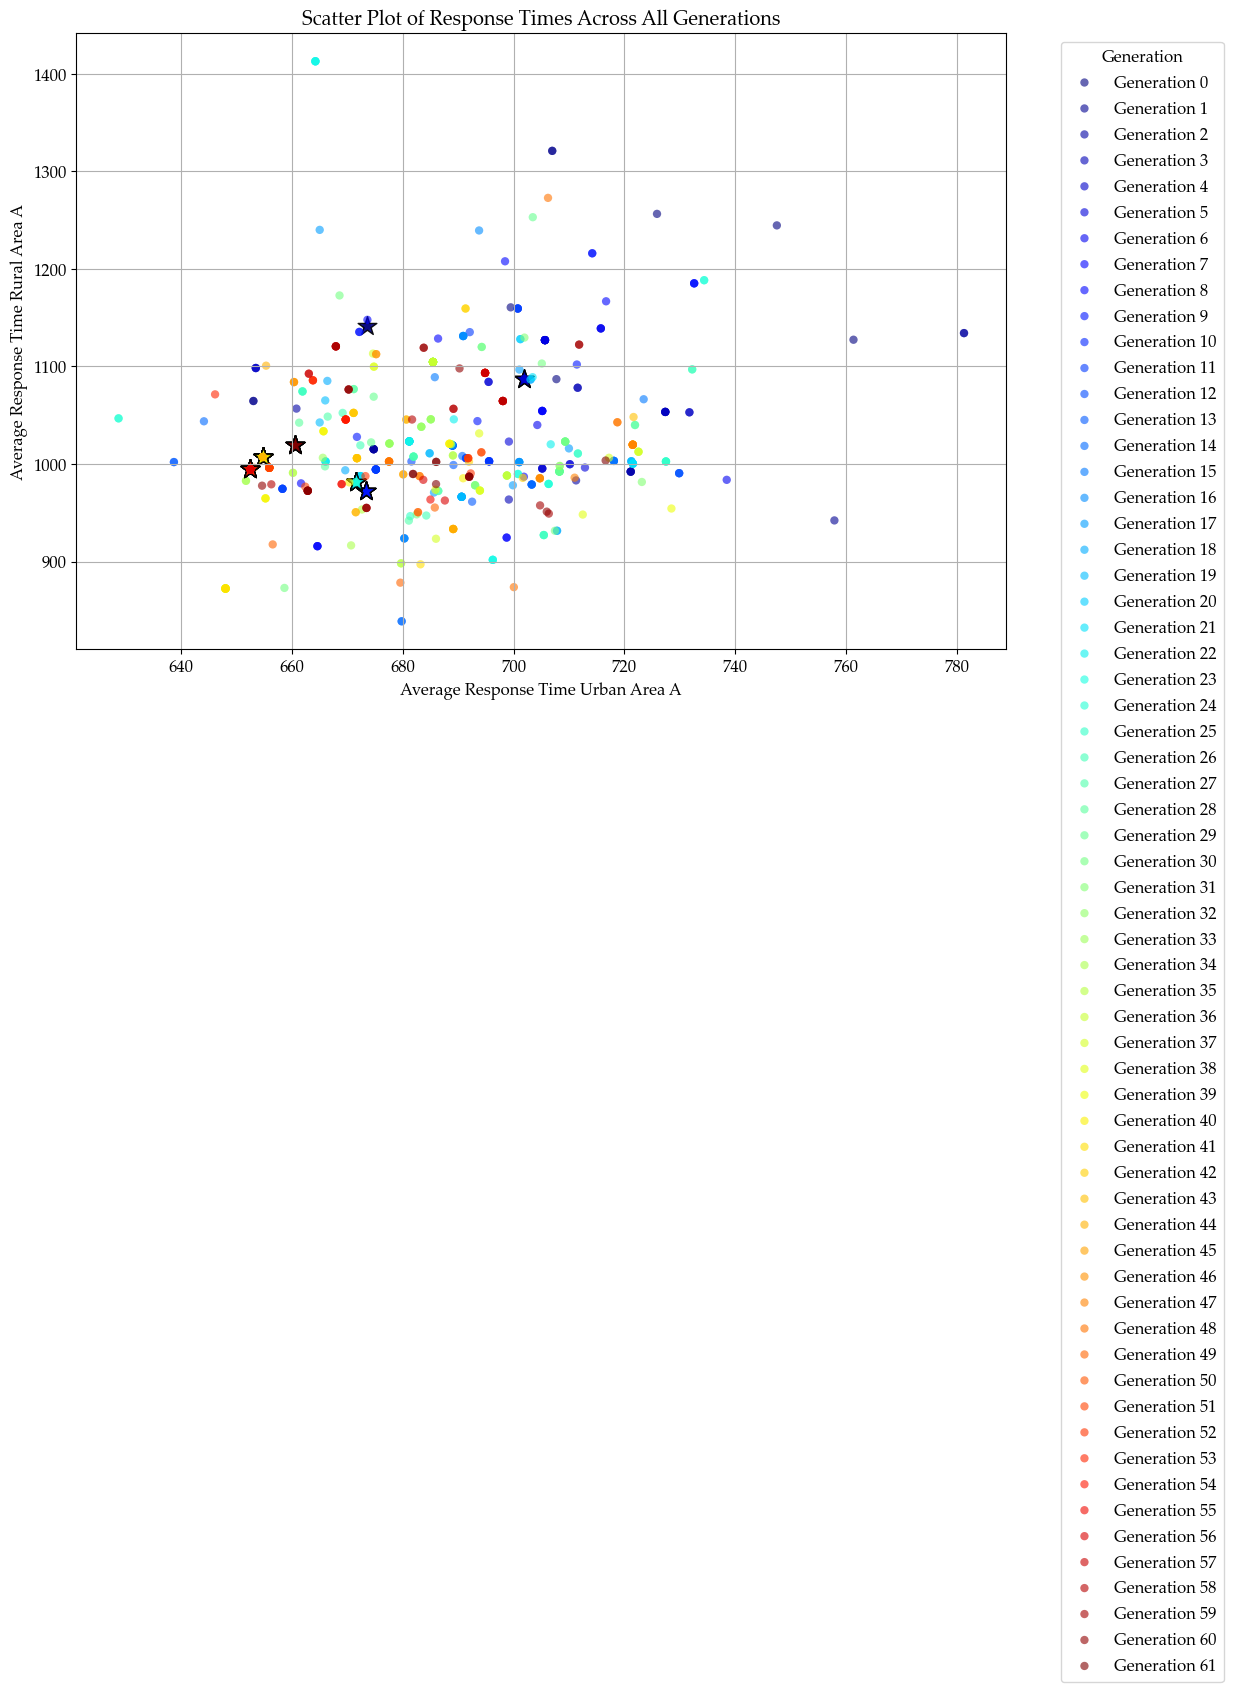

In [14]:
scatter_plot_over_two_objectives(ga_data, generation=None, onlyBest=False)


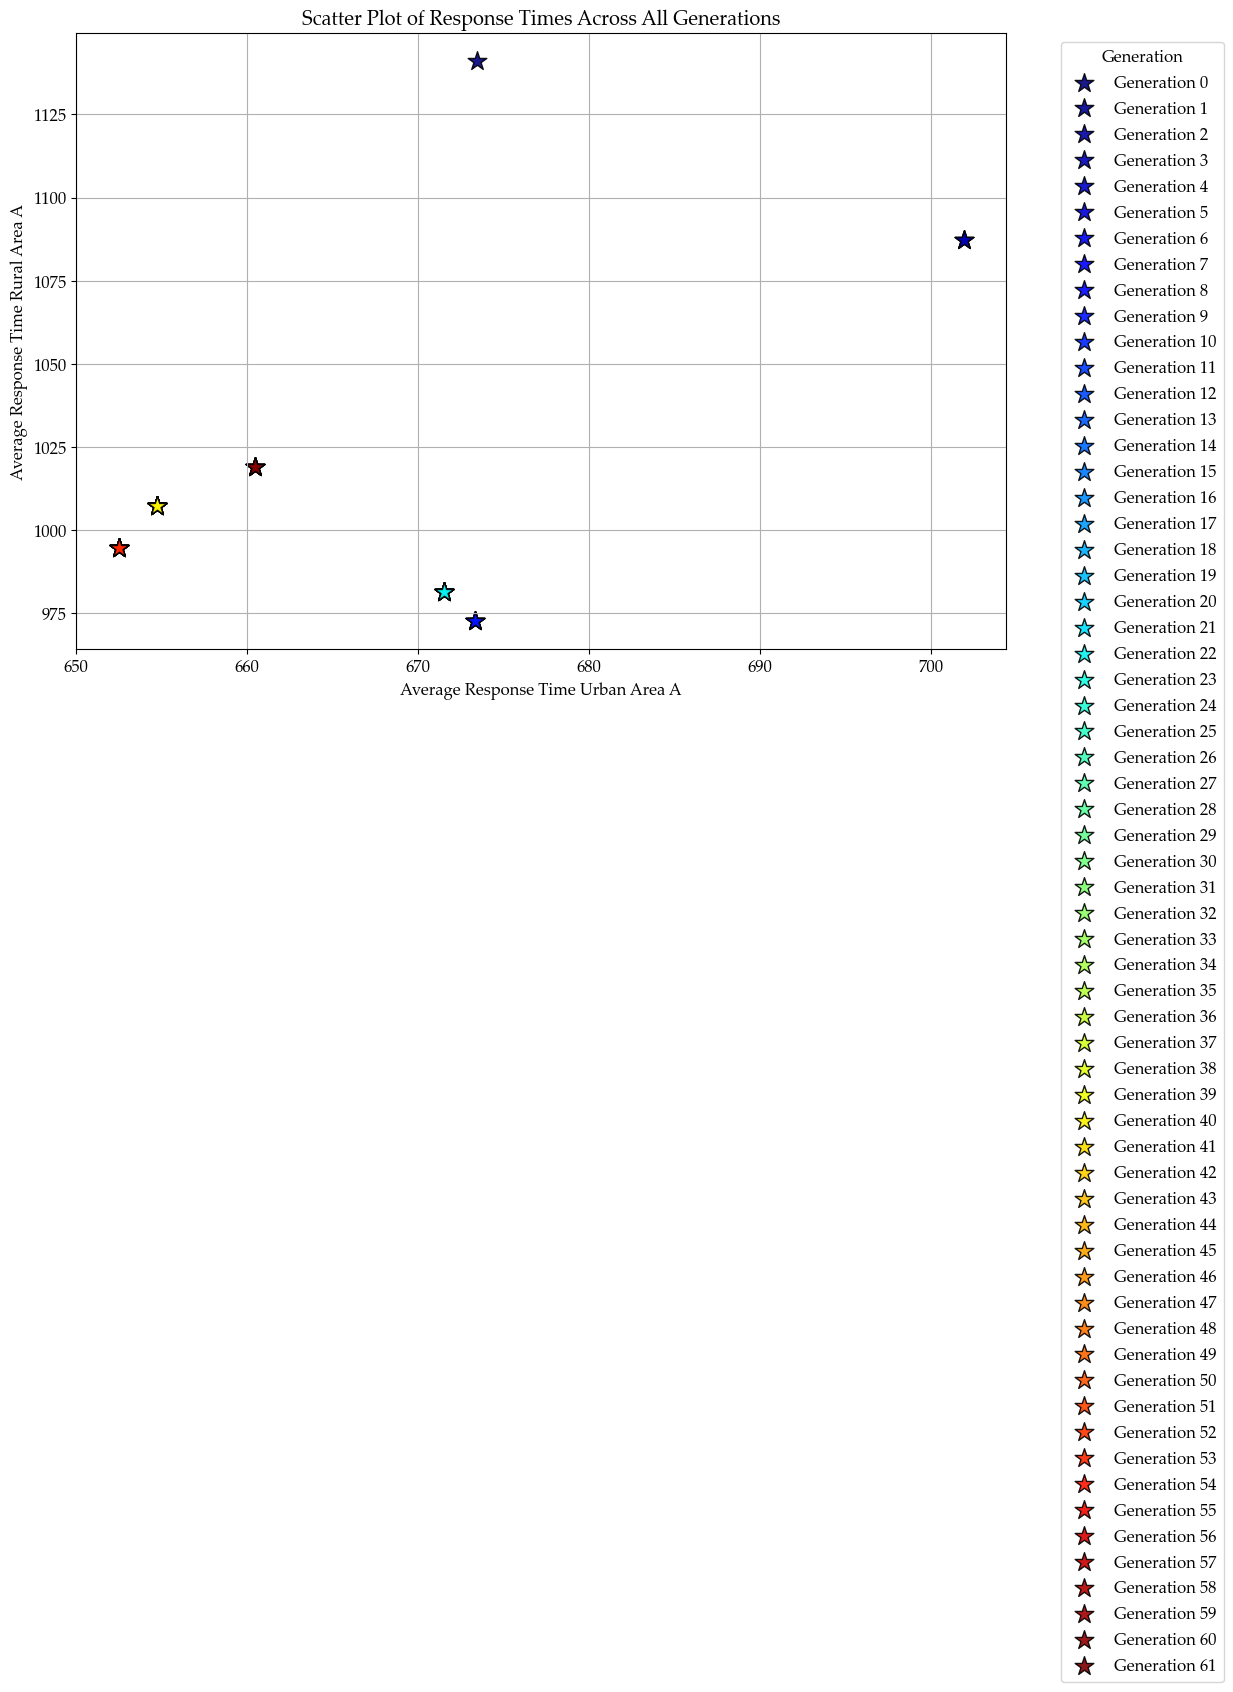

In [15]:
scatter_plot_over_two_objectives(ga_data, generation=None, onlyBest=True)


<Figure size 1200x800 with 0 Axes>

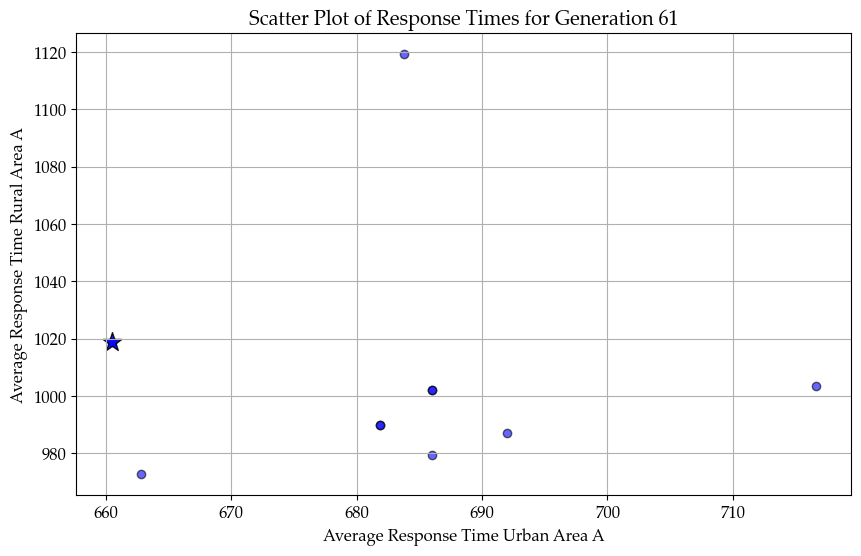

In [16]:
initial_population = 0
final_generation = len(ga_data["fitness"]) - 1

scatter_plot_over_two_objectives(ga_data, generation=final_generation, onlyBest=False)
